# Models

## Lesson Goals
* Understand the various Claude models
* Compare the speed and capabilities of the Claude models


Let's start by importing the `anthropic` SDK and loading our API key:

In [22]:
from dotenv import load_dotenv
from anthropic import Anthropic

load_dotenv()

client = Anthropic()

## Claude models

The Claude Python SDK supports multiple models, each with different capabilities and performance characteristics.  This visualization compares cost vs. speed across Claude 3 and 3.5 models, showcasing the range in tradeoffs between cost and intelligence:

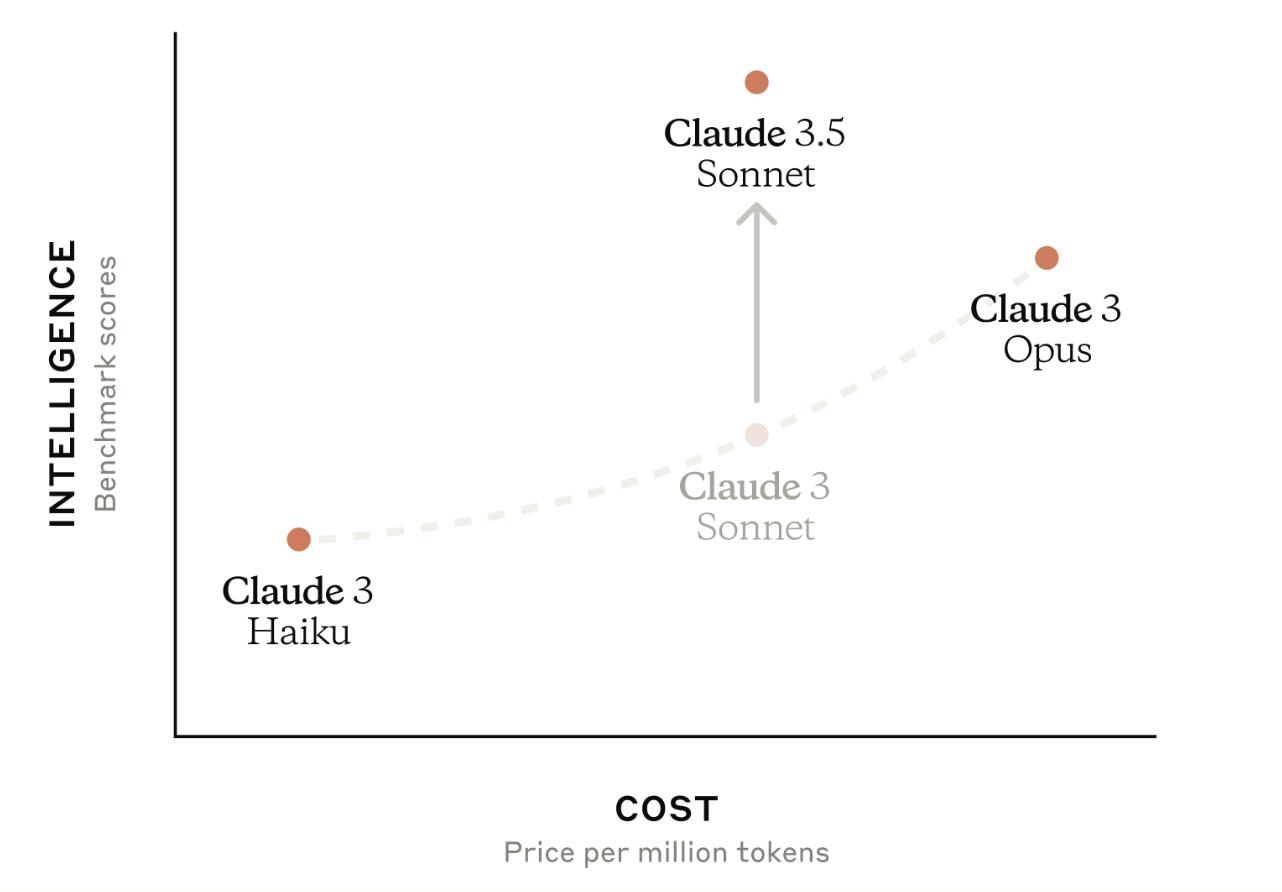

When choosing a model, there a few important factors to consider:

* The model's latency (how fast is it?)
* The model's capabilities (how smart is it?)
* The model's cost (how expensive is it?)



Refer to [this table](https://docs.anthropic.com/en/docs/about-claude/models#model-comparison-table) for a comparison of the key features and capabilities of each model in the Claude family.

## Comparing model speeds

Below is a simple function that runs the same prompt for all 4 models and prints out the model response and the time each request took.  

In [3]:
import time
def compare_model_speeds():
    models = ["claude-3-5-sonnet-20240620","claude-3-opus-20240229", "claude-3-sonnet-20240229", "claude-3-haiku-20240307"]
    task = "Explain the concept of photosynthesis in a concise paragraph."

    for model in models:
        start_time = time.time()

        response = client.messages.create(
            model=model,
            max_tokens=500,
            messages=[{"role": "user", "content": task}]
        )

        end_time = time.time()
        execution_time = end_time - start_time
        tokens = response.usage.output_tokens
        time_per_token = execution_time/tokens

        print(f"Model: {model}")
        print(f"Response: {response.content[0].text}")
        print(f"Generated Tokens: {tokens}")
        print(f"Execution Time: {execution_time:.2f} seconds")
        print(f"Time Per Token: {time_per_token:.2f} seconds\n")

In [4]:
compare_model_speeds()

Model: claude-3-5-sonnet-20240620
Response: Photosynthesis is the process by which plants, algae, and some bacteria convert light energy into chemical energy. These organisms use sunlight, water, and carbon dioxide to produce glucose (a type of sugar) and oxygen. The process occurs primarily in the chloroplasts of plant cells, where chlorophyll, a green pigment, absorbs light energy. This energy is then used to drive a series of chemical reactions that ultimately result in the production of glucose, which serves as food for the plant and can be stored for later use. Oxygen is released as a byproduct of this process, making photosynthesis crucial for maintaining Earth's atmosphere and supporting life on the planet.
Generated Tokens: 146
Execution Time: 2.56 seconds
Time Per Token: 0.02 seconds

Model: claude-3-opus-20240229
Response: Photosynthesis is the process by which green plants and some other organisms use sunlight to synthesize nutrients from carbon dioxide and water. In plants,

The exact responses you get when running the above code will differ, but here's a table summarizing the particular output we got when running the above code: 


| Model | Generated Tokens | Execution Time (seconds) | Time Per Token (seconds) |
|-------|------------------|--------------------------|--------------------------|
| claude-3-5-sonnet-20240620 | 146 | 2.56 | 0.02 |
| claude-3-opus-20240229 | 146 | 7.32 | 0.05 |
| claude-3-sonnet-20240229 | 108 | 2.64 | 0.02 |
| claude-3-haiku-20240307 | 126 | 1.09 | 0.01 |

It's also important to note that with a simple prompt like "Explain the concept of photosynthesis in a concise paragraph," all of the models perform well.  In this particular case, it would likely make sense to pick the fastest and cheapest option. 



The above example is a simple illustration of model speed differences, but it's not a very rigorous demonstration. Here's a plot we generated by providing all 3 models the same input prompt 50 times and averaging the response time for each model.  To ensure a "fair" comparison, we prompted the models to generate extremely long outputs, and then we cut off all model responses at exactly the same number of tokens using `max_tokens` (we cover this in the next lesson).

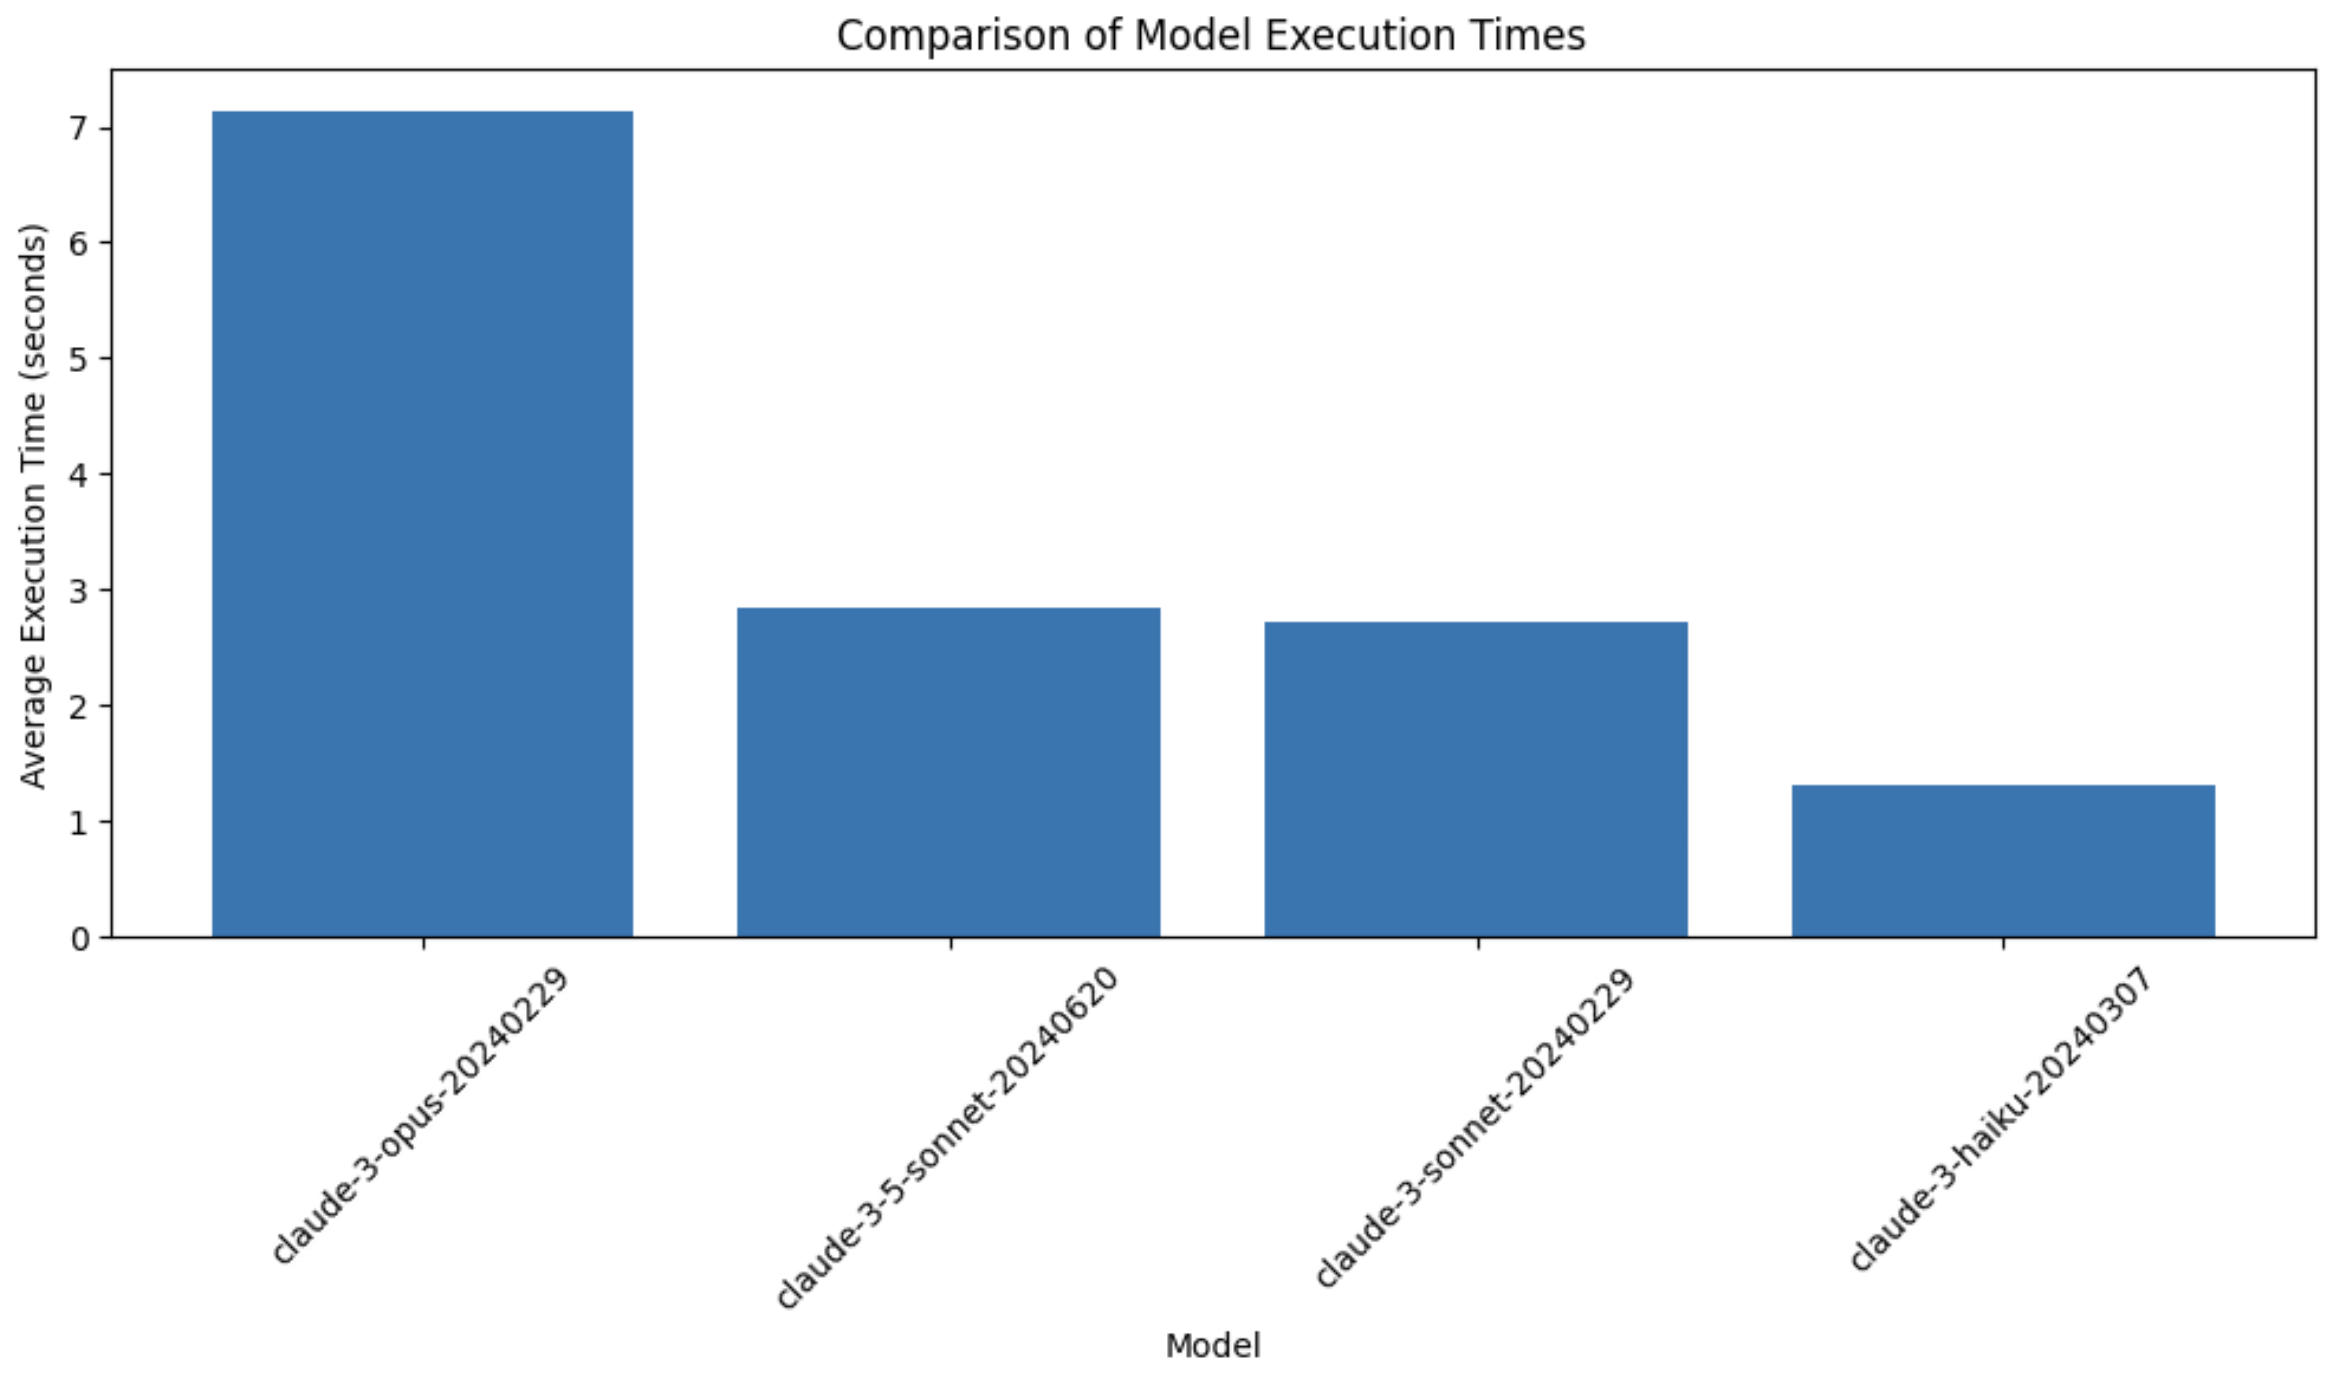

## Comparing model capabilities

Clearly Haiku is the fastest model, so why would we bother to use the others? It all comes down to the trade-off between model speed, cost, and overall capabilities.  Haiku is the fastest, but its outputs may not be as high-quality as Opus's in certain situations. With that said, it's important to note that in many cases, Haiku can perform as well as some of our more capable models.  The only way to truly know which model is the "best" for your specific use case is to try them out and evaluate their performance.

In general, we recommend using our most capable model, Claude 3.5 Sonnet, for use cases involving:
* **Coding:** Claude 3.5 Sonnet writes, edits, and runs code autonomously, streamlining code translations for faster, more accurate updates and migrations.
* **Customer support:** Claude 3.5 Sonnet understands user context and orchestrates multi-step workflows, enabling 24/7 support, faster responses, and improved customer satisfaction.
* **Data science & analysis:** Claude 3.5 Sonnet navigates unstructured data, generates insights, and produces visualizations and predictions to enhance data science expertise.
* **Visual processing:** Claude 3.5 Sonnet excels at interpreting charts, graphs, and images, accurately transcribing text to derive insights beyond just the text alone.
* **Writing:** Claude 3.5 Sonnet represents a significant improvement in understanding nuance and humor, producing high-quality, authentic, and relatable content.

If your intersted in a benchmark comparison between our Claude family of models, please read our [Claude family model card](https://www-cdn.anthropic.com/f2986af8d052f26236f6251da62d16172cfabd6e/claude-3-model-card.pdf) for more information.

### Demonstrating capabilities

It's hard to showcase the various capabilities of each model with a single demo, but the function below attempts to do so.
We ask each of the three models to solve the following math problem: 

```
What is the geometric monthly fecal coliform mean of a distribution system with the following FC
 counts: 24, 15, 7, 16, 31 and 23? The result will be inputted into a NPDES DMR, therefore, round
 to the nearest whole number
```

**NOTE: the correct answer is 18**

We ask each model to solve the math problem 7 times and record the answer each time:

In [19]:
def compare_model_capabilities():
    models = ["claude-3-5-sonnet-20240620", "claude-3-opus-20240229", "claude-3-sonnet-20240229", "claude-3-haiku-20240307"]
    task = """
    What is the geometric monthly fecal coliform mean of a distribution system with the following FC
 counts: 24, 15, 7, 16, 31 and 23? The result will be inputted into a NPDES DMR, therefore, round
 to the nearest whole number.  Respond only with a number and nothing else.
    """

    for model in models:
        answers = []
        for attempt in range(7):
            response = client.messages.create(
                model=model,
                max_tokens=1000,
                messages=[{"role": "user", "content": task}]
            )
            answers.append(response.content[0].text)

        print(f"Model: {model}")
        print(f"Answers: ", answers)

In [20]:
compare_model_capabilities()

Model: claude-3-5-sonnet-20240620
Answers:  ['18', '18', '18', '18', '18', '18', '18']
Model: claude-3-opus-20240229
Answers:  ['18', '18', '18', '18', '18', '18', '18']
Model: claude-3-sonnet-20240229
Answers:  ['18', '17', '16', '17', '19', '18', '18']
Model: claude-3-haiku-20240307
Answers:  ['17', '17', '18', '17', '17', '17', '18']


The exact outputs we get from each model will vary, but here's a summary of the results from a single run: 

* `claude-3-5-sonnet-20240620` - gets the right answer **7/7** times
* `claude-3-opus-20240229` - gets the right answer **7/7** times
* `claude-3-sonnet-20240229` - gets the right answer **3/7** times
* `claude-3-haiku-20240307` - gets the right answer **2/7** times

Clearly Claude 3.5 Sonnet and Claude 3 Opus perform best on this particular math problem. 

**Note: this is a very simplistic demonstration of model capabilities. It is not at all a rigorous comparison and only serves as an accessible educational demo. Please refer to the Claude 3 model card for a more rigorous, quantitative comparison using industry-standard benchmarks**


## Picking a model

The next logical question is: which model should you use?  It's a difficult question to answer without knowing the specific tasks and demands of a given application.  The choice of model can significantly impact the performance, user experience, and cost-effectiveness of your application:

* **Capabilities**
  * The first and foremost consideration is whether the model possesses the necessary capabilities to handle the tasks and use cases specific to your application. Different models have varying levels of performance across different domains, such as general language understanding, task-specific knowledge, reasoning abilities, and generation quality. It's essential to align the model's strengths with the demands of your application to ensure optimal results.
* **Speed**
  * The speed at which a model can process and generate responses is another critical factor, particularly for applications that require real-time or near-real-time interactions. Faster models can provide a more responsive and seamless user experience, reducing latency and improving overall usability. However, it's important to strike a balance between speed and model capabilities, as the fastest model may not always be the most suitable for your specific needs.
* **Cost**
  * The cost associated with using a particular model is a practical consideration that can impact the viability and scalability of your application. Models with higher capabilities often come with a higher price tag, both in terms of API usage costs and computational resources required. It's crucial to assess the cost implications of different models and determine the most cost-effective option that still meets your application's requirements.

#### One approach: start with Haiku

When experimenting, we often recommend starting with the Haiku model. Haiku is a lightweight and fast model that can serve as an excellent starting point for many applications. Its speed and cost-effectiveness make it an attractive option for initial experimentation and prototyping. In many use cases, Haiku proves to be perfectly capable of generating high-quality responses that meet the needs of the application. By starting with Haiku, you can quickly iterate on your application, test different prompts and configurations, and gauge the model's performance without incurring significant costs or latency. If you are unhappy with the responses, it's easy to "upgrade" to a model like Claude 3.5 Sonnet.


#### Evaluating and upgrading
As you develop and refine your application, it's essential to set up a comprehensive suite of evaluations specific to your use case and prompts. These evaluations will serve as a benchmark to measure the performance of your chosen model and help you make informed decisions about potential upgrades.

If you find that Haiku's responses do not meet your application's requirements or if you desire higher levels of sophistication and accuracy, you can easily transition to more capable models like Sonnet or Opus. These models offer enhanced capabilities and can handle more complex tasks and nuanced language understanding.

By establishing a rigorous evaluation framework, you can objectively compare the performance of different models across your specific use case. This empirical evidence will guide your decision-making process and ensure that you select the model that best aligns with your application's needs.

***